# Pré-processamento de dados do Dataset 
Aplicando técnicas de pré-processamento ao dataset "enhanced student habits performance" disponível em https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

Importando bibliotecas e lendo o dataset

In [25]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

df=pd.read_csv("enhanced_student_habits_performance_dataset.csv")
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84


Verificando se existem colunas com valores faltantes

In [26]:
valores_faltantes=df.isnull().sum()

valores_faltantes=valores_faltantes[valores_faltantes>0]
if valores_faltantes.empty:
    print("Não foram encontrados valores faltantes.")
else:
    print("Colunas com valores faltantes:\n",valores_faltantes)

Não foram encontrados valores faltantes.


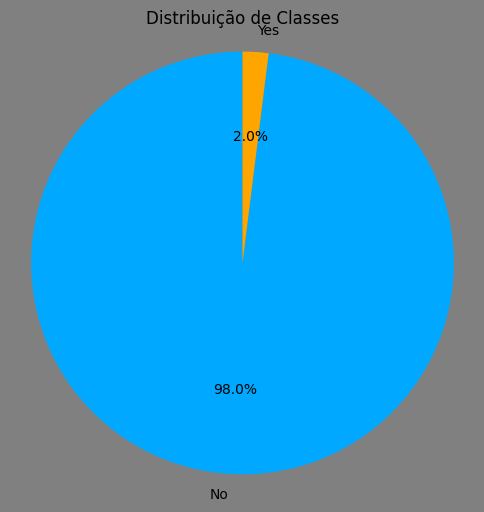

In [27]:
#plotando Distribuição de Classes
count = df['dropout_risk'].value_counts()

fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()


# Amostragem de dados

In [28]:
# Aleatória com 20% dos dados
df_sample = df.sample(frac=0.2, random_state=42)
df_sample

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
47044,147044,25,Other,Engineering,2.600000,4.8,2.5,Yes,43.3,7.9,...,11.1,Library,No,High,6,3,10,Kinesthetic,5.6,100
44295,144295,26,Female,Arts,3.200000,2.1,0.8,No,52.9,6.9,...,6.7,Co-Learning Group,Yes,Medium,8,5,10,Visual,2.3,79
74783,174783,22,Male,Psychology,4.500000,2.3,2.2,No,42.0,8.2,...,9.1,Cafe,No,High,2,3,10,Kinesthetic,9.3,66
70975,170975,22,Female,Computer Science,7.650183,1.2,2.0,No,87.4,8.4,...,11.2,Cafe,Yes,High,9,2,10,Visual,2.9,89
46645,146645,23,Male,Biology,3.900000,4.5,1.8,No,53.4,5.3,...,11.4,Quiet Room,Yes,High,10,1,10,Kinesthetic,3.0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67666,167666,22,Other,Biology,2.600000,3.8,3.9,No,77.5,6.4,...,12.2,Cafe,Yes,Medium,6,6,9,Visual,6.5,92
51146,151146,18,Male,Biology,4.600000,4.0,2.2,Yes,61.3,9.6,...,12.7,Cafe,No,High,4,8,7,Kinesthetic,8.9,78
42494,142494,26,Other,Arts,5.900000,3.3,2.9,No,85.8,7.6,...,13.2,Co-Learning Group,No,High,1,5,10,Reading,6.7,78
52517,152517,16,Female,Biology,3.900000,1.9,3.3,No,62.3,8.2,...,10.8,Library,Yes,High,8,10,5,Auditory,9.6,87


Verificando os tipos de dados de cada coluna

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

# Limpeza de Dados

In [30]:
df = df.dropna()
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84


# Eliminação de Atributos

In [31]:

#Para a retirada de atributos, é só acrescentar os atributos os nomes dos atributos em aspas simples, como o 'student_id'
df_sem_atributos = df.drop(columns=['student_id', 'social_media_hours', 'netflix_hours','parental_support_level','learning_style','time_management_score','internet_quality','part_time_job','study_environment'])
display(df_sem_atributos.head(8))

print("Número de colunas:", df_sem_atributos.shape[1])

,age,gender,major,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,...,semester,stress_level,dropout_risk,social_activity,screen_time,access_to_tutoring,family_income_range,motivation_level,exam_anxiety_score,exam_score
0,26,Male,Computer Science,7.645367,70.3,6.2,Poor,3,Some College,6.0,...,5,5.8,No,0,10.9,Yes,High,7,8,100
1,28,Male,Arts,5.700000,88.4,7.2,Good,4,PhD,6.8,...,7,5.8,No,5,8.3,Yes,Low,2,10,99
2,17,Male,Arts,2.400000,82.1,9.2,Good,4,High School,5.7,...,4,8.0,No,5,8.0,Yes,High,9,6,98
3,27,Other,Psychology,3.400000,79.3,4.2,Fair,3,Master,8.5,...,6,4.6,No,3,11.7,Yes,Low,3,10,100
4,25,Female,Business,4.700000,62.9,6.5,Good,6,PhD,9.2,...,4,5.7,No,2,9.4,Yes,Medium,1,10,98
5,17,Female,Engineering,4.200000,49.2,9.2,Good,3,PhD,9.2,...,3,1.5,No,2,8.9,No,High,10,5,94
6,19,Male,Psychology,4.100000,97.9,8.5,Good,6,Some College,5.8,...,2,2.5,No,3,9.2,Yes,High,7,8,97
7,17,Male,Psychology,4.100000,44.3,7.4,Fair,5,Master,4.8,...,2,5.3,No,3,10.0,Yes,Low,3,10,84


Número de colunas: 22


Não rodar este bloco por enquanto. Ideias futuras

In [32]:
"""
#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna 'stress_exam_combined'
df["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2

#Retirando os atributos 'stress_level' e 'exam_anxiety_score' para deixar apenas a nova coluna 'stress_exam_combined'
df_sem_atributos = df.drop(columns=['stress_level', 'exam_anxiety_score'])
print(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())
df_sem_atributos.head(8)
"""

'\n#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna \'stress_exam_combined\'\ndf["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2\n\n#Retirando os atributos \'stress_level\' e \'exam_anxiety_score\' para deixar apenas a nova coluna \'stress_exam_combined\'\ndf_sem_atributos = df.drop(columns=[\'stress_level\', \'exam_anxiety_score\'])\nprint(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())\ndf_sem_atributos.head(8)\n'

# Transformação de Dados
Para esta fase, é selecionado todos atributos que tem valor não numérico e convertido, após isso é realizado a normalização de todos eles

In [33]:
print("Tipos de dados antes da transformação: ")
print(df_sem_atributos.dtypes)

nao_numericos = df_sem_atributos.select_dtypes(include='object').columns.to_list()
numericos = df_sem_atributos.select_dtypes(include=['int64','float64'])

print(f"Conlunas não numéricas: {nao_numericos}")
print(f"Conlunas numéricas: {list(numericos)}")

Tipos de dados antes da transformação: 
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                    int64
screen_time                      float64
access_to_tutoring                object
family_income_range               object
motivation_level                   int64
exam_anxiety_score                 int64
exam_score                         int64
dtype: object
Conlunas não numéricas: ['gender', 'major', 

In [34]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Codificação categórica ordinal
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(df_sem_atributos[nao_numericos])

df_nao_numericos = pd.DataFrame(encoded,
                                columns=nao_numericos,
                                index=df_sem_atributos.index)

df_label = df_sem_atributos['dropout_risk']
df_separado = df_sem_atributos.drop(columns=['dropout_risk'] + nao_numericos)

df_pre_processado = pd.concat([df_separado, df_nao_numericos],axis=1)
display(df_pre_processado)


,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,...,exam_anxiety_score,exam_score,gender,major,diet_quality,parental_education_level,extracurricular_participation,dropout_risk,access_to_tutoring,family_income_range
0,26,7.645367,70.3,6.2,3,6.0,4.00,5,5.8,0,...,8,100,1.0,3.0,2.0,4.0,1.0,0.0,1.0,0.0
1,28,5.700000,88.4,7.2,4,6.8,4.00,7,5.8,5,...,10,99,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0
2,17,2.400000,82.1,9.2,4,5.7,3.79,4,8.0,5,...,6,98,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,27,3.400000,79.3,4.2,3,8.5,4.00,6,4.6,3,...,10,100,2.0,5.0,0.0,2.0,1.0,0.0,1.0,1.0
4,25,4.700000,62.9,6.5,6,9.2,4.00,4,5.7,2,...,10,98,0.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,16,3.700000,80.8,6.1,0,1.0,3.40,2,2.1,1,...,10,88,1.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0
79996,16,1.200000,99.5,4.1,0,5.7,2.26,1,3.9,3,...,10,52,0.0,2.0,1.0,4.0,1.0,0.0,0.0,1.0
79997,26,4.100000,46.1,8.3,7,6.7,3.15,3,5.6,3,...,10,89,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0
79998,23,3.800000,58.7,5.8,2,7.6,3.67,6,2.4,4,...,7,96,2.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0


In [35]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split

#Decision Trees
def decision_tree(X_train, y_train,X_test,y_test):
    #Treinando o modelo
    tree_clf = tree.DecisionTreeClassifier(random_state=42)

    #Decidindo os hiperparâmentros
    parameters = { 
        'criterion': ['gini', 'entropy'], 
        'max_depth': [None, 5, 10, 20], #profundidade máx da árvore
        'min_samples_split': [2, 5, 10], #mínimo de amostras para dividir um nó interno
        'min_samples_leaf': [1, 2, 4] #mínimo de amostras por nó folha
    }
    clf = GridSearchCV(estimator = tree_clf, param_grid = parameters, cv = 5, scoring='accuracy')

    clf.fit(X_train,y_train) #treina com todas as combinações
    best_tree = clf.best_estimator_ #escolhe o com melhor desempenho

    #Avaliando o modelo
    tree_pred = best_tree.predict(X_test)
    accuracy = accuracy_score(y_test, tree_pred)
    f1 = f1_score(y_test,tree_pred, average='weighted')
    print("Melhores hiperparâmetros:", clf.best_params_)
    print("Accuracy:", accuracy, "f1:",f1)

    return accuracy,f1

#plt.figure(figsize=(20,10))
#tree.plot_tree(best_tree, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=label_enconder.classes_, filled=True)
#plt.show()
# max_depth profundidade da árvore
# filled=True colore os nós de acordo com a classe predominante
# feature_names mostra quais palavras sao mais importantes para as decisoes

In [ ]:
X = df_pre_processado.drop(columns=["dropout_risk"])

y = df_pre_processado["dropout_risk"] # Rótulos ham ou spam
label_enconder = LabelEncoder()
y_enconder = label_enconder.fit_transform(y) #transforma o label em número: 0->ham 1->spam

# Configuração do kfold
skf = StratifiedKFold(n_splits=10)

# Armazenar métricas
accuracy_scores = []
f1_scores = []

for i,(train_index, test_index) in enumerate(skf.split(X,y_enconder)):
    X_train_fold = X.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    y_train_fold = [y_enconder[i] for i in train_index]
    y_test_fold = [y_enconder[i] for i in test_index]

    print("_____________________________________________________")
    print(f"Fold {i+1}:")
    accuracy, f1 = decision_tree(X_train_fold,y_train_fold,X_test_fold,y_test_fold)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Resultados finais
print("_____________________________________________________")
print(f"Acurácia: {accuracy_scores}")
print(f"F1-score: {f1_scores}")

#deu ruim essa merda


_____________________________________________________
Fold 1:
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0 f1: 1.0
_____________________________________________________
Fold 2:
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0 f1: 1.0
_____________________________________________________
Fold 3:
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0 f1: 1.0
_____________________________________________________
Fold 4:
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0 f1: 1.0
_____________________________________________________
Fold 5:
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0 f1: 1.0
__________